# 1. Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
sns.set_theme()

# 2. Read files
The dataset contains 3 files: the prices of listing on airbnb, room types, and reviews of customer. Specific documentation for each of 3 files is below:
1. Reviews
- listing_id: the id of each listing (key)
- host_name: Name of the host
- last_review: the date of each listing's last review
2. Prices
- listing_id: the id of each listing (key)
- price: price of each airbnb listing in the market
- nbhood_full: Full name of each listing's neighborhood
3. Room types
- listing_id: the id of each listing (key)
- 

In [2]:
reviews = pd.read_csv('./data/airbnb_last_review.tsv', sep='\t')
prices = pd.read_csv('./data/airbnb_price.csv')
room_types = pd.read_excel('./data/airbnb_room_type.xlsx')

In [3]:
display(reviews.head(), '\n', prices.head(), '\n', room_types.head())

,listing_id,host_name,last_review
0,2595,Jennifer,May 21 2019
1,3831,LisaRoxanne,July 05 2019
2,5099,Chris,June 22 2019
3,5178,Shunichi,June 24 2019
4,5238,Ben,June 09 2019


'\n'

,listing_id,price,nbhood_full
0,2595,225 dollars,"Manhattan, Midtown"
1,3831,89 dollars,"Brooklyn, Clinton Hill"
2,5099,200 dollars,"Manhattan, Murray Hill"
3,5178,79 dollars,"Manhattan, Hell's Kitchen"
4,5238,150 dollars,"Manhattan, Chinatown"


'\n'

,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt


In [4]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  object
 2   nbhood_full  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


In [5]:
room_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   description  25199 non-null  object
 2   room_type    25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   host_name    25201 non-null  object
 2   last_review  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


In [7]:
prices['price'] = prices['price'].str.rstrip(' dollars').astype(int)

In [8]:
prices['price'] = prices['price'].astype(int)

In [9]:
prices['price'].describe()

count    25209.000000
mean       141.777936
std        147.349137
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       7500.000000
Name: price, dtype: float64

While 75% of the prices fall below the 175 dollars benchmark, there are other outliers ranging from a min of 0 dollar(?) to a max of 7500 dollars AirBnb (could delve into further analysis of other factor contributing to the price listing).

For free listing, including them into the analysis is not important, hence we should remove those

In [10]:
free_rooms = prices[prices['price'] == 0]
prices = prices.drop(free_rooms.index)

In [11]:
avg_price = prices['price'].mean()
print(f"The average price of listings on Airbnb is {avg_price:.2f}$")

The average price of listings on Airbnb is 141.82$


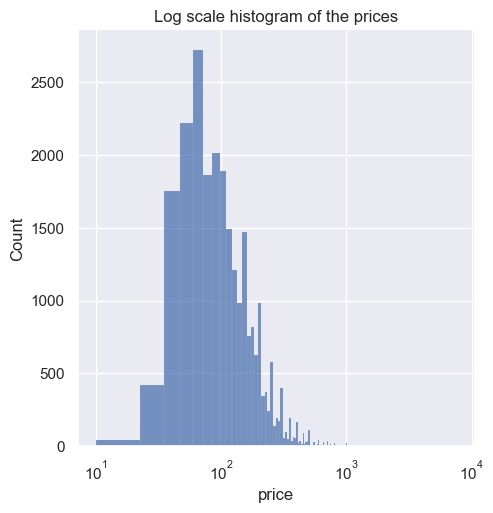

In [16]:
# Plot a histogram of the prices
sns.displot(data=prices, x='price', bins=600)
plt.xscale('log')
plt.title('Log scale histogram of the prices')
plt.show()